<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">


# Web Scraping for Indeed.com and Predicting Salaries

### Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal wants you to

   - determine the industry factors that are most important in predicting the salary amounts for these data.

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries.

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer this question.

---

### Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to address the question above.

### Factors that impact salary

To predict salary the most appropriate approach would be a regression model.
Here instead we just want to estimate which factors (like location, job title, job level, industry sector) lead to high or low salary and work with a classification model. To do so, split the salary into two groups of high and low salary, for example by choosing the median salary as a threshold (in principle you could choose any single or multiple splitting points).

Use all the skills you have learned so far to build a predictive model.
Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to be able to extrapolate or predict the expected salaries for these listings.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10").

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

The URL here has many query parameters:

- `q` for the job search
- This is followed by "+20,000" to return results with salaries (or expected salaries >$20,000)
- `l` for a location 
- `start` for what result number to start on

In [ ]:
URL = "http://www.indeed.com/jobs?"

In [4]:
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm_notebook

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

pd.set_option('display.max_colwidth',1000, 'display.max_columns',1000)

Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is in a `span` with `class='salaryText'`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element='jobTitle'`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 
- Decide which other components could be relevant, for example the region or the summary of the job advert.

### Write 4 functions to extract each item: location, company, job, and salary.

Example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- **Make sure these functions are robust and can handle cases where the data/field may not be available.**
    - Remember to check if a field is empty or `None` for attempting to call methods on it.
    - Remember to use `try/except` if you anticipate errors.
- **Test** the functions on the results above and simple examples.

In [ ]:
## YOUR CODE HERE

def extract_title_from_result(result):
    try:
        return result.find('a', attrs={'class':'jobtitle', 'data-tn-element':'jobTitle'}).text.strip()
    except:
        np.nan
    
def extract_company_from_result(result):
    try:
        return result.find('span', attrs={'class':'company'}).text.strip()
    except:
        return np.nan
        
def extract_rating_from_result(result):
    try:
        return result.find('span', attrs={'class':'ratingsDisplay'}).text.strip()
    except:
        return np.nan
        
def extract_location_from_result(result):
    try:
        return result.find('span', attrs={'class':'location'}).text.strip()
    except:
        return np.nan

def extract_summary_from_result(result):
    try:
        return result.find('div', attrs={'class':'summary'}).text.strip()
    except:
        return np.nan

def extract_date_from_result(result):
    try:
        return result.find('span', attrs={'class':'date'}).text.strip()
    except:
        return np.nan

def extract_salary_from_result(result):
    try:
        return result.find('span', attrs={'class':'salaryText'}).text.strip()
    except:
        return np.nan
    
def calc_salary_USD_from_salary(result):
    try:
        return extract_salary_from_result(result)*fx_rate[str(city)]
    except:
        return extract_salary_from_result(result)

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

### Complete the following code to collect results from multiple cities and starting points. 
- Enter your city below to add it to the search.
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different.

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

In [ ]:
## YOUR CODE HERE

import re

UK_CITY = ['London', 'Edinburgh', 'Cambridge', 'Oxford', 'Manchester', 'Reading', 'Bristol', 'Belfast',
            'Leeds', 'Glasgow', 'Birmingham', 'Nottingham']
UK_FX_rate = 1.3

max_results_per_city = 5000
job_city = {}
run_count = 0

for city in set(['New+York', 'Chicago', 'San+Francisco', 'Austin', 'Seattle', 'Los+Angeles', 'Philadelphia',
                 'Atlanta', 'Dallas', 'Pittsburgh', 'Portland', 'Phoenix', 'Denver', 'Houston',
                 'Miami'] + UK_CITY):
    
    title = []
    company = []
    rating = []
    search_city = []
    location = []
    salary = []
    age = []
    summary = []
    
    run_count+=1
    print('Searching City number: ', run_count)

    for occupation in set(['data scientist', 'data analyst', 'data analytics', 'data engineer',
                           'business intelligence', 'machine learning', 'artificial intelligence']): 
        old_page = 0
        print('Running: ', str(city),' & ',str(occupation))

        for page in tqdm_notebook(range(0, max_results_per_city, 10)):
            if city in UK_CITY:
                URL = "http://www.indeed.co.uk/jobs?"
                PARAMS = dict(as_phr=str(occupation), l=city, start=page)
            else:
                URL = "http://www.indeed.com/jobs?"
                PARAMS = dict(as_phr=str(occupation), l=city, start=page)

            r = requests.get(url=URL, params=PARAMS)
            soup = BeautifulSoup(r.text, 'html.parser')

            if soup.find('div', attrs={'id':'searchCountPages'}) == None:
                break
            else:
                new_page = int(re.findall(re.compile(r'\w+'), soup.find('div', attrs={'id':'searchCountPages'}).text.strip('\n'))[1])

                if new_page > old_page:
                    old_page = new_page
                    for posting in soup.find_all('div', attrs={'class':'result'}):
                        title.append(extract_title_from_result(posting))
                        company.append(extract_company_from_result(posting))
                        rating.append(extract_rating_from_result(posting))
                        search_city.append(city)
                        location.append(extract_location_from_result(posting))
                        salary.append(extract_salary_from_result(posting))
                        age.append(extract_date_from_result(posting))
                        summary.append(extract_summary_from_result(posting))
                else:
                    break

    # creating a df for that city's results and writing it to [insert city].csv...
    job_city_df = pd.DataFrame(dict(title=title,company=company,rating=rating,search_city=search_city,
                                    location=location,salary=salary,age=age,summary=summary))
    job_city_df.to_csv(str(city)+'.csv', index=False)
    
print('FINISHED')

In [ ]:
# Load in CSVs and create a dataframe from it:

jobs = pd.DataFrame()

for city in set(['New+York', 'Chicago', 'San+Francisco', 'Austin', 'Seattle', 'Los+Angeles', 'Philadelphia',
                 'Atlanta', 'Dallas', 'Pittsburgh', 'Portland', 'Phoenix', 'Denver', 'Houston',
                 'Miami'] + UK_CITY):

    jobs_city = pd.read_csv(str(city)+'.csv')

    if 'Unnamed: 0' in pd.read_csv(str(city)+'.csv').columns: # to check if csv was saved with index (above)
        jobs_city.drop(columns=['Unnamed: 0'], inplace=True)
    else:
        break
    jobs = jobs.append(jobs_city, ignore_index=True)

print(jobs.shape)
jobs.head()

Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now.
1. Some of the entries may be duplicated.
1. The salaries are given as text and usually with ranges.

#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries.

In [ ]:
## YOUR CODE HERE: adding salary frequencies, and restricting on yearly salaries, also dropping dupes.
jobs_salaried = jobs[jobs['salary'].notnull()]

# find and remove dupes first:
print('Total shape:',jobs_salaried.shape)
print('Duplicates:',jobs_salaried[jobs_salaried.duplicated()].shape)

jobs_salaried.drop_duplicates(inplace=True)
print('Any dupes left?:',jobs_salaried[jobs_salaried.duplicated()].shape)

# create salary_freq column and filter for only yearly salaries:
salary_freq = []
for sal in jobs_salaried['salary']:
    if 'year' in sal:
        salary_freq.append('year')
    elif 'month' in sal:
        salary_freq.append('month')
    elif 'week' in sal:
        salary_freq.append('week')
    elif 'day' in sal:
        salary_freq.append('day')
    elif 'hour' in sal:
        salary_freq.append('hour')
    else:
        salary_freq.append(np.nan)
        
jobs_salaried.insert(6, 'salary_freq', salary_freq)
print('Unique Salary Frequencies found:',jobs_salaried.salary_freq.unique())

jobs_salaried_year = jobs_salaried[jobs_salaried['salary_freq']=='year']
print('Checking only year remains:',jobs_salaried_year.salary_freq.unique())
print('Jobs Salaried Yearly:',jobs_salaried_year.shape)

#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary.

In [ ]:
## YOUR CODE HERE: creating salary_avg from salary ranges, and dollarizing UK salaries

import re
from re import sub
from decimal import Decimal

jobs_salaried_year.insert(7, 'isRange', jobs_salaried_year.apply(lambda x: 'Range' if '-' in x['salary'] else
                                                        'Not Range', axis=1))

salary_range_min = []
salary_range_max = []
salary_avg = []
salary_avg_USD = []

for x in jobs_salaried_year[['salary','isRange']].values:
    if x[1] == 'Not Range':
        salary_range_min.append(Decimal(sub(r'[^\d.]', '', x[0])))
        salary_range_max.append(Decimal(sub(r'[^\d.]', '', x[0])))
        salary_avg.append(Decimal(sub(r'[^\d.]', '', x[0])))

    if x[1] == 'Range':
        range_min = re.findall(r'[\d.,]+',x[0])[0]
        range_min = Decimal(sub(r',','',range_min))
        salary_range_min.append(range_min)
        
        range_max = re.findall(r'[\d.,]+',x[0])[1]
        range_max = Decimal(sub(r',','',range_max))
        salary_range_max.append(range_max)
        
        salary_avg.append((range_min+range_max)/2)
    
jobs_salaried_year.insert(8, 'salary_range_min', salary_range_min)
jobs_salaried_year.insert(9, 'salary_range_max', salary_range_max)
jobs_salaried_year.insert(10, 'salary_avg', salary_avg)

jobs_salaried_year.insert(11, 'salary_avg_USD',
                         jobs_salaried_year.apply(lambda x: round(Decimal(UK_FX_rate)*x['salary_avg'],2) 
                                                  if x['search_city'] in UK_CITY
                                                  else x['salary_avg'], axis=1))

jobs_salaried_year.head(1)

### Save your results as a CSV

In [ ]:
## YOUR CODE HERE: write to csv
jobs_salaried_year.to_csv('indeed_results.csv', index=False)

### Load in the the data of scraped salaries

In [5]:
## YOUR CODE HERE: load in indeed.csv
import pandas as pd
indeed = pd.read_csv('indeed_results.csv')

### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median).

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries.

In [6]:
## YOUR CODE HERE: Binarize salary
indeed.insert(12,
              'target',
              Binarizer(threshold=indeed.salary_avg_USD.median()).fit_transform([indeed.salary_avg_USD])[0])

#### Thought experiment: What is the baseline accuracy for this model?

In [7]:
## YOUR CODE HERE: baseline accuracy
baseline = indeed.target.value_counts(normalize=True).max()
print('Baseline Accuracy:',baseline)
print('High vs Low threshold:', indeed.salary_avg_USD.median())
print('Normalized Value Counts:')
print(indeed.target.value_counts(normalize=True))

Baseline Accuracy: 0.507835945315105
High vs Low threshold: 65000.0
Normalized Value Counts:
0.0    0.507836
1.0    0.492164
Name: target, dtype: float64


### Create a classification model to predict High/Low salary. 


- Start by ONLY using the location as a feature.
- Use at least two different classifiers you find suitable.
- Remember that scaling your features might be necessary.
- Display the coefficients/feature importances and write a short summary of what they mean.
- Create a few new variables in your dataframe to represent interesting features of a job title (e.g. whether 'Senior' or 'Manager' is in the title).
- Incorporate other text features from the title or summary that you believe will predict the salary.
- Then build new classification models including also those features. Do they add any value?
- Tune your models by testing parameter ranges, regularization strengths, etc. Discuss how that affects your models.
- Discuss model coefficients or feature importances as applicable.

In [16]:
## YOUR CODE HERE: using two different classifiers on location only

# set X,y
X = indeed['search_city']
y = indeed['target']

X_dum = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, stratify=y, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = [BaggingClassifier(n_estimators=100),
          RandomForestClassifier(n_estimators=100),
          GradientBoostingClassifier(n_estimators=100,
                                     random_state=1,
                                     validation_fraction=0.1,
                                     max_depth=3,
                                     n_iter_no_change=20)]
params = [{'max_features': np.linspace(0.3,0.4,3)},
          {'max_depth': list(range(2,20,5)),
           'min_samples_split': np.linspace(0.3,0.4,3)},
          {'learning_rate': np.linspace(.1,1.,4)}]

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

for i in range(len(models)):
    gs = GridSearchCV(models[i], params[i], n_jobs=2, cv=kf, verbose=1)
    gs.fit(X_train, y_train)
    print('Best params:',gs.best_params_)
    print('Cross Val Score:',gs.best_score_)
    predictions = gs.predict(X_test)
    print('Confusion Matrix:')
    print(' ')
    print(confusion_matrix(y_test, predictions, labels=[0,1]))
    print('Classification Report:')
    print(' ')
    print(classification_report(y_test, predictions))
    
# Add feature importances for best gs model:
print('Best estimator:', gs.best_estimator_)

if 'BaggingClassifier' in gs.best_estimator_:
    feature_importances = pd.DataFrame({'importance':np.mean([tree.feature_importances_ for tree in gs.estimators_], axis=0)},
                                                 index=X_dum.columns)
else:
    feature_importances = pd.DataFrame({'importance':gs.best_estimator_.feature_importances_},
                                                 index=X_dum.columns)
    
feature_importances.sort_values('importance',ascending=False).T

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    1.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best params: {'max_features': 0.3}
Cross Val Score: 0.6233892600841375
Confusion Matrix:
 
[[171 210]
 [ 72 297]]
Classification Report:
 
              precision    recall  f1-score   support

         0.0       0.70      0.45      0.55       381
         1.0       0.59      0.80      0.68       369

    accuracy                           0.62       750
   macro avg       0.64      0.63      0.61       750
weighted avg       0.65      0.62      0.61       750

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:    5.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best params: {'max_depth': 17, 'min_samples_split': 0.35}
Cross Val Score: 0.6273932195001237
Confusion Matrix:
 
[[168 213]
 [ 64 305]]
Classification Report:
 
              precision    recall  f1-score   support

         0.0       0.72      0.44      0.55       381
         1.0       0.59      0.83      0.69       369

    accuracy                           0.63       750
   macro avg       0.66      0.63      0.62       750
weighted avg       0.66      0.63      0.62       750

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best params: {'learning_rate': 0.1}
Cross Val Score: 0.625615441722346
Confusion Matrix:
 
[[169 212]
 [ 67 302]]
Classification Report:
 
              precision    recall  f1-score   support

         0.0       0.72      0.44      0.55       381
         1.0       0.59      0.82      0.68       369

    accuracy                           0.63       750
   macro avg       0.65      0.63      0.62       750
weighted avg       0.65      0.63      0

[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    1.4s finished


,Reading,Birmingham,Nottingham,New+York,Cambridge,San+Francisco,Philadelphia,Edinburgh,Portland,Chicago,Austin,London,Dallas,Pittsburgh,Seattle,Miami,Houston,Los+Angeles,Phoenix,Denver
importance,0.231076,0.178165,0.147039,0.094652,0.074229,0.047271,0.041299,0.038105,0.034849,0.030104,0.0199,0.01487,0.010573,0.010069,0.009851,0.008267,0.003414,0.00331,0.002959,0.0


In [17]:
# Feature-engineering Title column:
# we start with TfidfVectorizer to get the unique features, and fit to regression to assess importance

from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer(stop_words='english', token_pattern='[A-Za-z]+', ngram_range=(1,1))
tvec.fit(indeed['title'])

X = tvec.transform(indeed['title'])
y = indeed.target

lr = LogisticRegression(solver='lbfgs', multi_class='ovr')
print(cross_val_score(lr,X,y,cv=kf).mean())
lr.fit(X,y)
pd.DataFrame(dict(coef=lr.coef_[0], features=tvec.get_feature_names())).sort_values('coef',ascending=False).head()

0.7605865331107401


,coef,features
302,3.484523,director
624,3.092856,lead
62,2.756825,architect
504,2.455418,head
1019,2.129793,senior


In [18]:
pd.DataFrame(dict(coef=lr.coef_[0], features=tvec.get_feature_names())).sort_values('coef',ascending=True).head()

,coef,features
485,-3.488157,graduate
602,-3.456703,junior
72,-2.369321,assistant
43,-2.140103,analyst
924,-2.086371,recruitment


In [19]:
# We choose the below interesting features to engineer for:

indeed.insert(1, 'isDS', indeed['title'].apply(lambda x: 1 if 'data science' in x.lower() or 'data scientist' in x.lower() else 0))
indeed.insert(2, 'isDA', indeed['title'].apply(lambda x: 1 if 'data analyst' in x.lower() or 'analytics' in x.lower() else 0))
indeed.insert(3, 'isDE', indeed['title'].apply(lambda x: 1 if 'data engineer' in x.lower() else 0))
indeed.insert(4, 'isDArch', indeed['title'].apply(lambda x: 1 if 'architect' in x.lower() else 0))
indeed.insert(5, 'isML', indeed['title'].apply(lambda x: 1 if 'ml' in x.lower() or 'machine learning' in x.lower() else 0))
indeed.insert(6, 'isAI', indeed['title'].apply(lambda x: 1 if 'ai' in x.lower() or 'artifical intelligence' in x.lower() else 0))
indeed.insert(7, 'isBI', indeed['title'].apply(lambda x: 1 if 'bi' in x.lower() or 'business intelligence' in x.lower() else 0))

indeed.insert(8, 'isDirector', indeed['title'].apply(lambda x: 1 if 'director' in x.lower() else 0))
indeed.insert(9, 'isHead', indeed['title'].apply(lambda x: 1 if 'head' in x.lower() else 0))
indeed.insert(10, 'isLead', indeed['title'].apply(lambda x: 1 if 'lead' in x.lower() else 0))
indeed.insert(11, 'isManager', indeed['title'].apply(lambda x: 1 if 'mgr' in x.lower() or 'manager' in x.lower() else 0))
indeed.insert(12, 'isVP', indeed['title'].apply(lambda x: 1 if 'vp' in x.lower() or 'vice president' in x.lower() else 0))
indeed.insert(13, 'isSenior', indeed['title'].apply(lambda x: 1 if 'sr' in x.lower() or 'senior' in x.lower() else 0))
indeed.insert(14, 'isJunior', indeed['title'].apply(lambda x: 1 if 'jr' in x.lower() or 'junior' in x.lower() else 0))
indeed.insert(15, 'isAssistant', indeed['title'].apply(lambda x: 1 if 'assistant' else 0))
indeed.insert(16, 'isGraduate', indeed['title'].apply(lambda x: 1 if 'grad' in x.lower() or 'graduate' in x.lower() else 0))
indeed.insert(17, 'isApprentice', indeed['title'].apply(lambda x: 1 if 'apprentice' in x.lower() else 0))

indeed.head(1)


,title,isDS,isDA,isDE,isDArch,isML,isAI,isBI,isDirector,isHead,isLead,isManager,isVP,isSenior,isJunior,isAssistant,isGraduate,isApprentice,company,rating,search_city,location,salary,salary_freq,isRange,salary_range_min,salary_range_max,salary_avg,salary_avg_USD,target,age,summary
0,account manager,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,BusinesStaff,NaN,Denver,"Denver, CO","$170,000 - $220,000 a year",year,Range,170000,220000,195000.0,195000.0,1.0,30+ days ago,"Strategic mindset with proven ability to synthesize customer financial reports, industry information and market intelligence to develop customer growth…"


In [20]:
# Clean up Rating column: replace null with None

indeed['rating'].fillna('None', inplace=True)

In [21]:
# Assess if improvement in model from adding title-features:

X_dum = pd.get_dummies(indeed[['company', 'rating', 'search_city']], drop_first=True)
X_dum_title = pd.concat([X_dum,indeed.loc[:,'isDS':'isApprentice']], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_dum_title, y, stratify=y, random_state=1)

models = [BaggingClassifier(n_estimators=100),
          RandomForestClassifier(n_estimators=100),
          GradientBoostingClassifier(n_estimators=100,
                                     random_state=1,
                                     validation_fraction=0.1,
                                     max_depth=3,
                                     n_iter_no_change=20)]
params = [{'max_features': np.linspace(0.3,0.4,3)},
          {'max_depth': list(range(2,20,5)),
           'min_samples_split': np.linspace(0.3,0.4,3)},
          {'learning_rate': np.linspace(.1,1.,4)}]

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

for i in range(len(models)):
    gs = GridSearchCV(models[i], params[i], n_jobs=2, cv=kf, verbose=1)
    gs.fit(X_train, y_train)
    print('Best params:',gs.best_params_)
    print('Cross Val Score:',gs.best_score_)
    predictions = gs.predict(X_test)
    print('Confusion Matrix:')
    print(' ')
    print(confusion_matrix(y_test, predictions, labels=[0,1]))
    print('Classification Report:')
    print(' ')
    print(classification_report(y_test, predictions))
    
# Add feature importances for best gs model:
print('Best estimator:', gs.best_estimator_)

if 'BaggingClassifier' in gs.best_estimator_:
    feature_importances = pd.DataFrame({'importance':np.mean([tree.feature_importances_ for tree in gs.estimators_], axis=0)},
                                                 index=X_dum_title.columns)
else:
    feature_importances = pd.DataFrame({'importance':gs.best_estimator_.feature_importances_},
                                                 index=X_dum_title.columns)
    
feature_importances.sort_values('importance',ascending=False).T

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   40.2s finished


Best params: {'max_features': 0.4}
Cross Val Score: 0.8030339024993814
Confusion Matrix:
 
[[308  73]
 [ 79 290]]
Classification Report:
 
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.80       381
         1.0       0.80      0.79      0.79       369

    accuracy                           0.80       750
   macro avg       0.80      0.80      0.80       750
weighted avg       0.80      0.80      0.80       750

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.8s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   13.1s finished


Best params: {'max_depth': 12, 'min_samples_split': 0.4}
Cross Val Score: 0.7323276416728532
Confusion Matrix:
 
[[286  95]
 [102 267]]
Classification Report:
 
              precision    recall  f1-score   support

         0.0       0.74      0.75      0.74       381
         1.0       0.74      0.72      0.73       369

    accuracy                           0.74       750
   macro avg       0.74      0.74      0.74       750
weighted avg       0.74      0.74      0.74       750

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:  1.3min finished


Best params: {'learning_rate': 0.4}
Cross Val Score: 0.7807978223212076
Confusion Matrix:
 
[[321  60]
 [ 96 273]]
Classification Report:
 
              precision    recall  f1-score   support

         0.0       0.77      0.84      0.80       381
         1.0       0.82      0.74      0.78       369

    accuracy                           0.79       750
   macro avg       0.79      0.79      0.79       750
weighted avg       0.79      0.79      0.79       750

Best estimator: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=20, presort='deprecated',
   

,isSenior,isLead,isDS,search_city_Reading,isGraduate,rating_None,isDE,isJunior,isDirector,isDA,isDArch,search_city_Nottingham,search_city_Birmingham,isManager,search_city_New+York,isHead,search_city_Cambridge,company_Linux Recruit,isApprentice,company_Media IQ Recruitment,search_city_Philadelphia,search_city_San+Francisco,company_Inspiring Interns,rating_4.2,company_Metrica Recruitment,company_E.ON UK,search_city_Edinburgh,company_The Yerba Mate Co.,company_Harnham,search_city_Denver,search_city_Portland,isML,rating_4.3,rating_3.7,rating_3.1,company_TalentPool,company_Digital Taxonomy,company_University of Oxford,rating_3.8,search_city_Dallas,company_Lloyds Banking Group,search_city_Austin,company_Tessella Ltd,company_Lead Foot Digital,search_city_Chicago,company_Concept Resourcing,company_Aspire Data Recruitment,company_ECM Selection,company_New York City DEPARTMENT OF INVESTIGATION,isVP,company_Barna Shields Recruitment,company_TechMate,company_ZenShin Talent,company_Robertson Sumner,company_Comcast,rating_3.3,company_Science Museum Group,company_Synaptic Resources Ltd,search_city_Pittsburgh,company_Fanbank,company_Navigator CRE,company_Moriati,company_Computer Enterprises,company_Understanding Recruitment,company_NYCM,company_Migacore Technologies,company_Catalyst forward,search_city_Seattle,search_city_London,company_RishTani Technologies Limited,company_Anya Consultancy Services Limited,company_IntelliSense Systems Inc.,company_UK Government - Driver and Vehicle Standards Agenc...,company_US Department of the Interior,company_New York City NYC HOUSING AUTHORITY,company_Houndstooth Capital Real Estate,company_Scottish Water,isBI,company_RaiseMe,company_EGIS INC,company_Acrotrend Solutions Limited,company_Astroscreen,company_Cortex IT Recruitment,search_city_Los+Angeles,company_DISYS,company_New York City HOUSING PRESERVATION & DVLPMNT,company_Deerfoot,company_Searchability,company_GCS Recruitment Specialists Ltd,company_Jenrick Group,company_Consortia,company_Oho Group,company_People Source Consulting,company_Church International Ltd.,company_Synovus,company_InterQuest Group,company_Carrot Pharma Recruitment,rating_3.6,company_TSB Banking,company_Cottonwood Financial,company_Amazing Prospects Ltd,company_Blue Pelican,"company_Kellington Protection Service, LLC",company_STFC,company_Media Contacts ltd,company_JFL Search & Selection,company_Douglas Jackson,company_Adzuna,company_New York City DEPARTMENT OF BUSINESS SERV.,company_Source,company_Ninety Thousand Hours,company_Guy's and St Thomas' NHS Foundation Trust,company_PCS GlobalTech,company_Global Market Summits – Chancery Lane,"company_Milshar, LLC",rating_2.9,company_US Department of Labor,company_Harrison Holgate,company_XenZone,company_Forsyth Barnes,rating_3.0,company_TECHIRE SOLUTIONS,company_Professional Technical Recruitment,company_Vadlo Systems,"company_Neumeister & Associates, LLP",company_Admiral Instruments,company_Wayhome,company_Redline Group,company_SQ Computer Personnel Limited,company_Market Vector,company_Hytalentech,company_Hinduja Global Solutions,company_Austin Fraser,company_Langley James IT Recruitment,"company_City of Los Angeles, CA","company_Go, Inc.",company_Psixty Recruitment,company_Eden Brown,company_CYTED Ltd,rating_2.8,company_Stanton House,company_California creative solutions,company_SPEKTRIX,"company_Indigent Legal Services, Office of",company_Association for Mental Health & Wellness,company_WORLDWIDE BUSINESS RESEARCH Ltd,company_Teleboom Inc D/B/A Deter24 Monitoring,company_DeVries Global,company_PR Futures,company_CatchFish,company_Spring,"company_Boulder County, CO",company_Truthful Trading Inc,company_Client Server,company_Omnicell,company_AKUVO,company_Cubex LLC,company_New York City DEPT OF HEALTH/MENTAL HYGIENE,company_Informatiq Consulting,company_Virgin Media,company_Premium Credit Limited,company_L&Q,company_Real Time Recruitment Solutions,company_Richard Wheeler Associates,company_Novation Solutions Ltd,company_Petroineos,c

In [23]:
# Incorporate other text features from the title or summary that you believe will predict the salary:

tvec = TfidfVectorizer(stop_words='english', token_pattern='[A-Za-z]+', ngram_range=(1,2), max_features=500)
tvec.fit(indeed['summary'])

tvec_summary = pd.DataFrame(tvec.transform(indeed['summary']).toarray(), columns=tvec.get_feature_names())

X_summary = pd.concat([X_dum_title,tvec_summary], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_summary, y, stratify=y, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = [BaggingClassifier(n_estimators=100),
          RandomForestClassifier(n_estimators=100),
          GradientBoostingClassifier(n_estimators=100,
                                     random_state=1,
                                     validation_fraction=0.1,
                                     max_depth=3,
                                     n_iter_no_change=20)]
params = [{'max_features': np.linspace(0.3,0.4,3)},
          {'max_depth': list(range(2,20,5)),
           'min_samples_split': np.linspace(0.3,0.4,3)},
          {'learning_rate': np.linspace(.1,1.,4)}]

for i in range(len(models)):
    gs = GridSearchCV(models[i], params[i], n_jobs=2, cv=kf, verbose=1)
    gs.fit(X_train, y_train)
    print('Best params:',gs.best_params_)
    print('Cross Val Score:',gs.best_score_)
    predictions = gs.predict(X_test)
    print('Confusion Matrix:')
    print(' ')
    print(confusion_matrix(y_test, predictions, labels=[0,1]))
    print('Classification Report:')
    print(' ')
    print(classification_report(y_test, predictions))
    
# Add feature importances for best gs model:
print('Best estimator:', gs.best_estimator_)

if 'BaggingClassifier' in gs.best_estimator_:
    feature_importances = pd.DataFrame({'importance':np.mean([tree.feature_importances_ for tree in gs.estimators_], axis=0)},
                                                 index=X_summary.columns)
else:
    feature_importances = pd.DataFrame({'importance':gs.best_estimator_.feature_importances_},
                                                 index=X_summary.columns)
    
feature_importances.sort_values('importance',ascending=False).T

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:  1.7min finished


Best params: {'max_features': 0.4}
Cross Val Score: 0.7603405097748083
Confusion Matrix:
 
[[306  75]
 [ 94 275]]
Classification Report:
 
              precision    recall  f1-score   support

         0.0       0.77      0.80      0.78       381
         1.0       0.79      0.75      0.76       369

    accuracy                           0.77       750
   macro avg       0.78      0.77      0.77       750
weighted avg       0.78      0.77      0.77       750

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   20.4s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   30.8s finished


Best params: {'max_depth': 17, 'min_samples_split': 0.3}
Cross Val Score: 0.7274466716159366
Confusion Matrix:
 
[[300  81]
 [105 264]]
Classification Report:
 
              precision    recall  f1-score   support

         0.0       0.74      0.79      0.76       381
         1.0       0.77      0.72      0.74       369

    accuracy                           0.75       750
   macro avg       0.75      0.75      0.75       750
weighted avg       0.75      0.75      0.75       750

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:  2.0min finished


Best params: {'learning_rate': 0.7}
Cross Val Score: 0.7492333580796833
Confusion Matrix:
 
[[279 102]
 [101 268]]
Classification Report:
 
              precision    recall  f1-score   support

         0.0       0.73      0.73      0.73       381
         1.0       0.72      0.73      0.73       369

    accuracy                           0.73       750
   macro avg       0.73      0.73      0.73       750
weighted avg       0.73      0.73      0.73       750

Best estimator: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.7, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=20, presort='deprecated',
   

,analyst,isSenior,rating_None,isGraduate,isLead,isDirector,search_city_Birmingham,isJunior,search_city_Reading,search_city_New+York,search_city_Nottingham,isDArch,company_University of Oxford,isDS,search_city_Cambridge,engineer,isHead,business,company_Media IQ Recruitment,proven,based,analytics,lead,company_Oregon Health & Science University,delivery,company_Linux Recruit,degree,business development,customer,manager,global,data,sales,agency,search_city_Philadelphia,company_E.ON UK,technical,machine,isDE,company_Inspiring Interns,start,working,creating,software,reports,search_city_Denver,search_city_San+Francisco,processing,intelligence,experienced,including,business intelligence,databases,company_Digital Taxonomy,time,excel,research,health,join,company_Warwickshire County Council,support,rating_4.2,deliver,company_Metrica Recruitment,perform,search_city_Edinburgh,using,science,rapidly,media,sets,post,project,data sources,company_Tessella Ltd,isApprentice,design,search_city_Chicago,help,cyber,key,rating_3.1,growing,search_city_London,company_New York City DEPARTMENT OF BUSINESS SERV.,company_Cottonwood Financial,company_Harnham,rating_4.5,rating_4.3,analytics team,k,company_TalentPool,work,years,build,preferred,testing,services,computer,experience,company_NYCM,company_Synaptic Resources Ltd,data science,company_Lloyds Banking Group,cloud,offer,artificial,growth,enterprise,seeking,analysis,company_IntelliSense Systems Inc.,development,field,company_Comcast,tax,company_Synaptek,opportunities,uk,e g,models,deep,search_city_Austin,employee work,search_city_Pittsburgh,company_Migacore Technologies,used,include,develop,closely,platforms,company_Robertson Sumner,business analyst,typically,company_Datatech Analytics,statistics,company_Northpoint Recruitment,following,company,designing,network,company_California creative solutions,excellent,e,skill,includes,company_Harrison Holgate,learning techniques,data analyst,company_JFL Search & Selection,order,position,hands,statistical,company_Hero Labs,company_Zynx Technologies Limited,venturi,interpret,looking,implement,teams,date,company_Synovus,company_RaiseMe,company_DVF Recruitment,company_SQ Computer Personnel Limited,advanced,world,company_Inspire People,finance,company_Respect Consulting Group,expertise,company_STFC,management,application,modelling,role,company_Deerfoot,scientist,large data,vision,ai,provide,permanent,wide,company_Astroscreen,needs,language,isDA,company_re&m,insight,company_Public Sector Information Ltd,sponsored,company_City Pantry,data engineer,company_Parallel Consulting,insights,company_Memorial MRI and Diagnostic LLC,company_Carrot Pharma Recruitment,mining,company_University Hospitals Birmingham NHS Foundation Tru...,responsible,focused,company_Allianz,new business,company_Preventa Medical Corporation,required,company_Hytalentech,expert,awarded,company_Covered Insurance Solutions,company_Media Contacts ltd,company_New York City DEPARTMENT OF INVESTIGATION,company_New York City HOUSING PRESERVATION & DVLPMNT,clients,java,isML,supporting,package,understanding,company_DP Connect,delivering,customers,company_Moriati,company_TSB Banking,company_SPEKTRIX,data analytics,level,rating_3.5,science machine,search_city_Phoenix,digital,rating_3.3,related,data scientist,training,learning,new,candidate,sources,experience working,use,company_Eason Group,ensure,analyse,years experience,company_Coventry University,senior,rating_3.7,marketing,strong,knowledge,isBI,machine learning,london,currently,company_The SmartList,company_The University of Pittsburgh,company_The Yerba Mate Co.,company_Veeve,company_TheMathCompany Inc.,company_Therapy Box,company_ThirdEye Labs,company_Thomsons Online Benefits,rating_4.1,company_Tier1 IT,company_Tim Hortons,rating_4.4,company_The Rosalind Franklin Institute,company_The Shopworks,rating_4.6,rating_4.7,rating_4.8,rating_4.9,rating_5.0,company_The Risk Partners,company_The Pioneer Group,company_The Perk Company Refresh Vending,company_The People Net

In [24]:
# The model actually deteriorates when text from the summary is added, so it appears that location and 
# features from the job title were key in correct classification.

# A ~60% accuracy was achieved only using search_city, which imporoved to 80% when included title features.
# Vectorizer helped with feature engineering as an intermediate step.

# A slight deterioration in score from adding text from summmary.

### Model evaluation:

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs.


- Use cross-validation to evaluate your models.
- Evaluate the accuracy, AUC, precision and recall of the models.
- Plot the ROC and precision-recall curves for at least one of your models.

In [27]:
# Best model was with city + title features (ie. excluding Summary text), so we reset X to that:

X_dum = pd.get_dummies(indeed[['company', 'rating', 'search_city']], drop_first=True)
X_dum_title = pd.concat([X_dum,indeed.loc[:,'isDS':'isApprentice']], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_dum_title, y, stratify=y, random_state=1)

# And re-run the best estimator:

best_model = GradientBoostingClassifier(n_estimators=100,
                                        learning_rate=0.4,
                                        random_state=1,
                                        validation_fraction=0.1,
                                        max_depth=3,
                                        n_iter_no_change=20)
best_model.fit(X_train, y_train)

y_pp = pd.DataFrame(best_model.predict_proba(X_test), columns=['class_0_pp','class_1_pp'])
y_pp.head()

,class_0_pp,class_1_pp
0,0.789904,0.210096
1,0.946806,0.053194
2,0.836273,0.163727
3,0.395738,0.604262
4,0.146663,0.853337


No handles with labels found to put in legend.
No handles with labels found to put in legend.


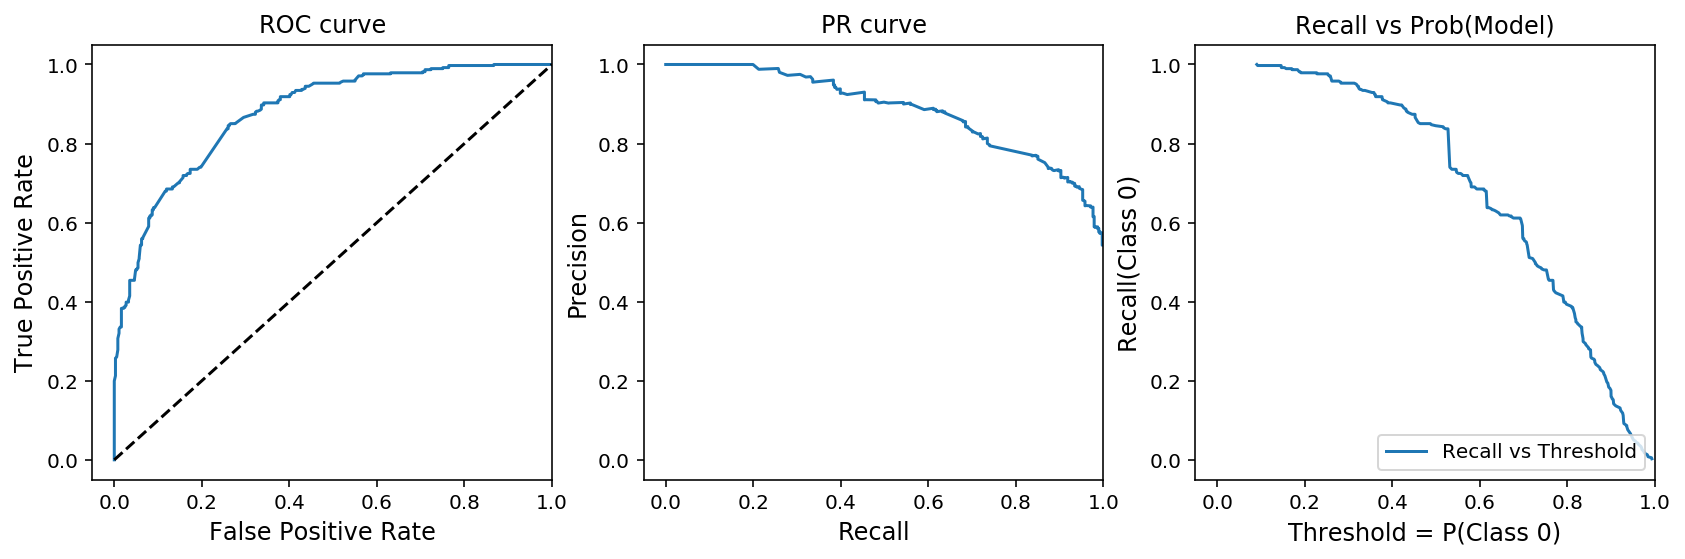

In [28]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, recall_score
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# For class 0, find the area under the curve
fpr, tpr, threshold = roc_curve(y_test, y_pp.class_0_pp, pos_label=0)
roc_auc = auc(fpr, tpr)
precision, recall, threshold = precision_recall_curve(y_test, y_pp.class_0_pp, pos_label=0)

# Plot ROC and precision-recall curves for class 0
fig, ax = plt.subplots(1, 3, figsize=[14, 4])

ax[0].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
ax[0].plot([0, 1], [0, 1], 'k--')
ax[0].set_xlim([-0.05, 1.0])
ax[0].set_ylim([-0.05, 1.05])
ax[0].set_xlabel('False Positive Rate', fontsize=12)
ax[0].set_ylabel('True Positive Rate', fontsize=12)
ax[0].set_title('ROC curve', fontsize=12)
plt.legend(loc="lower right")

ax[1].plot(recall, precision, label='PR curve')
ax[1].set_xlim([-0.05, 1.0])
ax[1].set_ylim([-0.05, 1.05])
ax[1].set_xlabel('Recall', fontsize=12)
ax[1].set_ylabel('Precision', fontsize=12)
ax[1].set_title('PR curve', fontsize=12)
plt.legend(loc="lower right")

ax[2].plot(threshold, recall[:-1], label='Recall vs Threshold')
ax[2].set_xlim([-0.05, 1.0])
ax[2].set_ylim([-0.05, 1.05])
ax[2].set_xlabel('Threshold = P(Class 0)', fontsize=12)
ax[2].set_ylabel('Recall(Class 0)', fontsize=12)
ax[2].set_title('Recall vs Prob(Model)', fontsize=12)
plt.legend(loc="lower right")

plt.show()

In [29]:
# Change the scoring method below to f1-score to help your boss be confident of the model?

X_dum = pd.get_dummies(indeed[['company', 'rating', 'search_city']], drop_first=True)
X_dum_title = pd.concat([X_dum,indeed.loc[:,'isDS':'isApprentice']], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_dum_title, y, stratify=y, random_state=1)

models = [BaggingClassifier(n_estimators=100),
          RandomForestClassifier(n_estimators=100),
          GradientBoostingClassifier(n_estimators=100,
                                     random_state=1,
                                     validation_fraction=0.1,
                                     max_depth=3,
                                     n_iter_no_change=20)]
params = [{'max_features': np.linspace(0.3,0.4,3)},
          {'max_depth': list(range(2,20,5)),
           'min_samples_split': np.linspace(0.3,0.4,3)},
          {'learning_rate': np.linspace(.1,1.,4)}]

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

for i in range(len(models)):
    gs = GridSearchCV(models[i], params[i], scoring='f1', n_jobs=2, cv=kf, verbose=1)
    gs.fit(X_train, y_train)
    print('Best params:',gs.best_params_)
    print('Cross Val Score:',gs.best_score_)
    predictions = gs.predict(X_test)
    print('Confusion Matrix:')
    print(' ')
    print(confusion_matrix(y_test, predictions, labels=[0,1]))
    print('Classification Report:')
    print(' ')
    print(classification_report(y_test, predictions))
    
# Add feature importances for best gs model:
print('Best estimator:', gs.best_estimator_)

if 'BaggingClassifier' in gs.best_estimator_:
    feature_importances = pd.DataFrame({'importance':np.mean([tree.feature_importances_ for tree in gs.estimators_], axis=0)},
                                                 index=X_dum_title.columns)
else:
    feature_importances = pd.DataFrame({'importance':gs.best_estimator_.feature_importances_},
                                                 index=X_dum_title.columns)
    
feature_importances.sort_values('importance',ascending=False).T

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   42.9s finished


Best params: {'max_features': 0.3}
Cross Val Score: 0.8023491055964813
Confusion Matrix:
 
[[308  73]
 [ 78 291]]
Classification Report:
 
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.80       381
         1.0       0.80      0.79      0.79       369

    accuracy                           0.80       750
   macro avg       0.80      0.80      0.80       750
weighted avg       0.80      0.80      0.80       750

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   19.4s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   22.5s finished


Best params: {'max_depth': 17, 'min_samples_split': 0.3}
Cross Val Score: 0.7345738703621576
Confusion Matrix:
 
[[279 102]
 [ 99 270]]
Classification Report:
 
              precision    recall  f1-score   support

         0.0       0.74      0.73      0.74       381
         1.0       0.73      0.73      0.73       369

    accuracy                           0.73       750
   macro avg       0.73      0.73      0.73       750
weighted avg       0.73      0.73      0.73       750

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:  1.7min finished


Best params: {'learning_rate': 1.0}
Cross Val Score: 0.7704804001320931
Confusion Matrix:
 
[[321  60]
 [103 266]]
Classification Report:
 
              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80       381
         1.0       0.82      0.72      0.77       369

    accuracy                           0.78       750
   macro avg       0.79      0.78      0.78       750
weighted avg       0.79      0.78      0.78       750

Best estimator: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=20, presort='deprecated',
   

,isSenior,rating_None,isLead,isDE,isGraduate,search_city_Reading,isDirector,isDS,isJunior,isDArch,isManager,search_city_Birmingham,search_city_New+York,search_city_Nottingham,search_city_Cambridge,isHead,search_city_Edinburgh,isDA,search_city_Philadelphia,company_Media IQ Recruitment,rating_5.0,search_city_London,company_Linux Recruit,company_Oregon Health & Science University,isApprentice,company_Digital Taxonomy,isVP,company_Lloyds Banking Group,company_The Yerba Mate Co.,company_E.ON UK,rating_3.8,company_New York City DEPARTMENT OF INVESTIGATION,company_University of Oxford,company_Barna Shields Recruitment,company_Inspiring Interns,company_Tessella Ltd,company_TalentPool,rating_3.1,search_city_Pittsburgh,search_city_San+Francisco,company_Comcast,search_city_Seattle,company_RaiseMe,company_Concept Resourcing,company_Lead Foot Digital,company_The Chat Shop,search_city_Austin,company_NYCM,company_New York City HOUSING PRESERVATION & DVLPMNT,company_Fanbank,company_Catalyst forward,company_Metrica Recruitment,rating_3.7,company_Synaptic Resources Ltd,isML,rating_3.3,company_EGIS INC,company_IntelliSense Systems Inc.,isBI,company_Cottonwood Financial,company_Migacore Technologies,company_Understanding Recruitment,company_ECM Selection,company_Market Vector,company_Moriati,company_ZenShin Talent,company_AKUVO,company_Carrot Pharma Recruitment,company_Adzuna,company_Astroscreen,company_Houndstooth Capital Real Estate,company_Church International Ltd.,company_Snap Finance Ltd (UK),company_New York City NYC HOUSING AUTHORITY,company_State of Colorado Job Opportunities,company_Douglas Jackson,rating_3.5,company_GCS Recruitment Specialists Ltd,company_Hytalentech,company_SQ Computer Personnel Limited,company_People Source Consulting,company_California creative solutions,company_Aspire Data Recruitment,rating_4.2,"company_Mechsoft Technology (USA) Co., LLC",company_TechMate,company_RishTani Technologies Limited,company_Anya Consultancy Services Limited,company_US Department of Labor,company_Avios Group,company_Diamond Light Source,company_University Hospitals Birmingham NHS Foundation Tru...,company_CatchFish,company_Truthful Trading Inc,company_R2M Marketing Solutions,"company_Indigent Legal Services, Office of",company_SPEKTRIX,company_Teleboom Inc D/B/A Deter24 Monitoring,company_Media Contacts ltd,company_Association for Mental Health & Wellness,company_Agency Within,company_Science Museum Group,company_JFL Search & Selection,company_Global Market Summits – Chancery Lane,company_Zynx Technologies Limited,company_Cortex IT Recruitment,company_DVCanvass,company_Ninety Thousand Hours,company_XenZone,company_Harrison Holgate,company_Navigator CRE,company_HireBlazer,isAI,company_Synovus,"company_Boulder County, CO",company_HomeSphere,company_Omnicell,company_Robertson Sumner,"company_City of Los Angeles, CA",rating_2.8,company_Neo Prism Solutions,company_Target Public Media,company_Regis University,company_Petroineos,company_Guy's and St Thomas' NHS Foundation Trust,company_University at Buffalo,company_New York City DEPARTMENT OF BUSINESS SERV.,"company_Neumeister & Associates, LLP",company_Source,company_System Recruitment,"company_City of Dallas, TX",company_STFC,company_IC Resources,company_Client Server,company_InterQuest Group,company_Deerfoot,company_Therapy Box,company_PR Futures,company_CYTED Ltd,company_Stanton House,company_Wayhome,company_Forsyth Barnes,company_University of the Arts London,company_CPA Global Limited,company_Franklin Bates,company_YouGov,company_Interaction Recruitment,company_Soho House & Co.,company_RHONDOS,company_Educational Service District 112,search_city_Chicago,company_Excelerate Recruitment Partners,company_Redline Group,"company_Data Warehouse Consultants, LLC",company_TransPerfect,company_UK Government - Driver and Vehicle Standards Agenc...,company_Impact Proteomics,company_Nutrisystem,company_Agility Resourcing,company_A Closer Look,company_Round Rock Independent School District,company_Nuvola

No handles with labels found to put in legend.
No handles with labels found to put in legend.


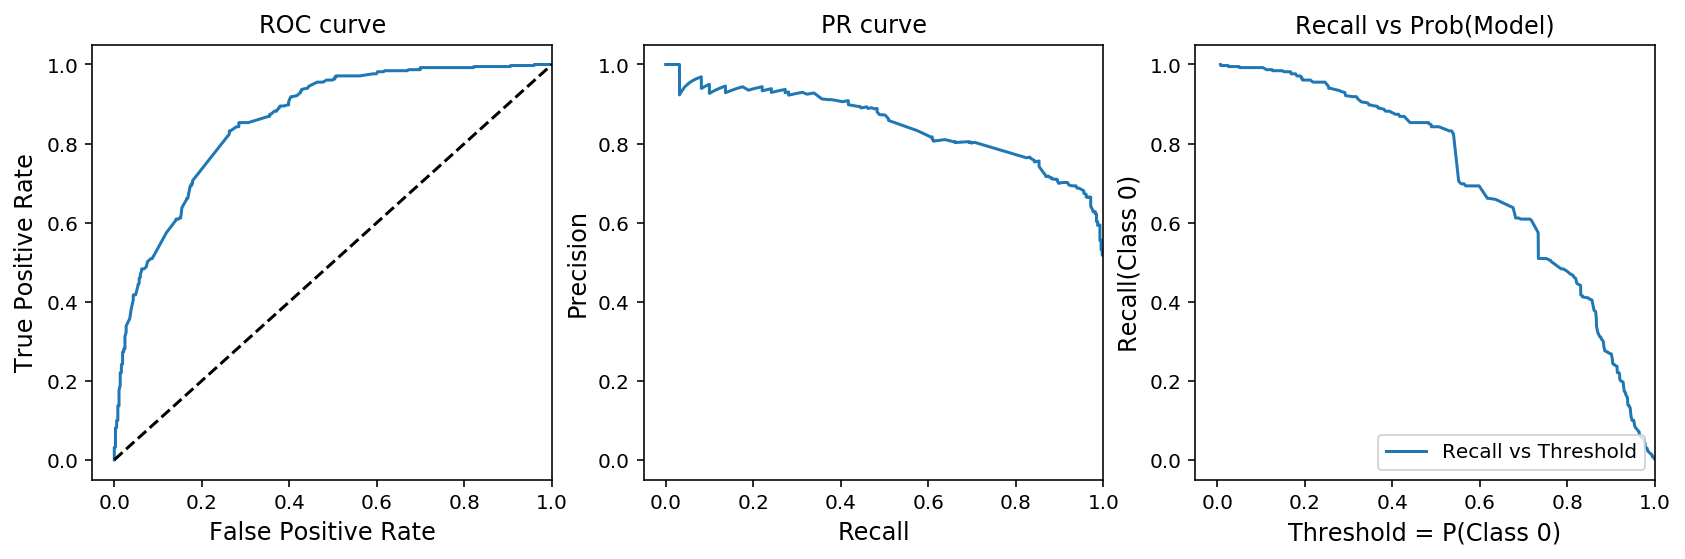

In [30]:
# Now to draw ROC, AUC curves for f1-scored best_model (which is now the last one, because Class 0 recall
# improved to 84% with only 60 occurences of a Low salary being mispredicted as High, as seen from the last
# confusion matrix:

y_pp = pd.DataFrame(gs.best_estimator_.predict_proba(X_test), columns=['class_0_pp','class_1_pp'])

# For class 0, find the area under the curve
fpr, tpr, threshold = roc_curve(y_test, y_pp.class_0_pp, pos_label=0)
roc_auc = auc(fpr, tpr)
precision, recall, threshold = precision_recall_curve(y_test, y_pp.class_0_pp, pos_label=0)

# Plot ROC and precision-recall curves for class 0
fig, ax = plt.subplots(1, 3, figsize=[14, 4])

ax[0].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
ax[0].plot([0, 1], [0, 1], 'k--')
ax[0].set_xlim([-0.05, 1.0])
ax[0].set_ylim([-0.05, 1.05])
ax[0].set_xlabel('False Positive Rate', fontsize=12)
ax[0].set_ylabel('True Positive Rate', fontsize=12)
ax[0].set_title('ROC curve', fontsize=12)
plt.legend(loc="lower right")

ax[1].plot(recall, precision, label='PR curve')
ax[1].set_xlim([-0.05, 1.0])
ax[1].set_ylim([-0.05, 1.05])
ax[1].set_xlabel('Recall', fontsize=12)
ax[1].set_ylabel('Precision', fontsize=12)
ax[1].set_title('PR curve', fontsize=12)
plt.legend(loc="lower right")

ax[2].plot(threshold, recall[:-1], label='Recall vs Threshold')
ax[2].set_xlim([-0.05, 1.0])
ax[2].set_ylim([-0.05, 1.05])
ax[2].set_xlabel('Threshold = P(Class 0)', fontsize=12)
ax[2].set_ylabel('Recall(Class 0)', fontsize=12)
ax[2].set_title('Recall vs Prob(Model)', fontsize=12)
plt.legend(loc="lower right")

plt.show()

In [31]:
# We should now use this model to tune for the right threshold level that we'd feel comfortable with.
# e.g. if we are happy to assign salary as Class 0 even if the P(Class 0) = 40%, then Recall for Class 0 
# would exceed 90% (from looking at the Recall vs Probability chart above)

# Further possible work to improve on the above...
# 1. Tableau visualisation map
# 2. NLTK conversion of NLP steps
# 3. Productionization step / piping to end it: once model / data cleaning steps identified
# 4. Claudia (TA) told me that the Summary text was truncated, and only once you expanded it did you have it 
# all, so I could also improve the scraping to get the whole Summary box.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### Bonus:

- Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions. 
- Discuss the differences and explain when you want a high-recall or a high-precision model in this scenario.
- Obtain the ROC/precision-recall curves for the different models you studied (at least the tuned model of each category) and compare.

### Summarize your results in an executive summary written for a non-technical audience.
   
- Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

In [ ]:
## YOUR TEXT HERE IN MARKDOWN FORMAT

##### <img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### BONUS

Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.